# Hackathon 1: Creating a Attrition Report using a machine learning model



### What is a hackathon?

A hackathon is an event designed to use technology, primarily coding, to accomplish an objective. In this case, the development of a simple machine learning classifier.


<div class="alert alert-success">
<b>About Dataset</b>

<u>Context</u>

This is a fictional data set created by IBM data scientists. Uncover the factors that lead to employee attrition and explore related human resource questions we need to analyze employee information.
 Typically job class specs have information which characterize the job class- its features, and a label- in this case a pay grade - something to predict that the features are related to.

<u>Content</u>

The data is a static snapshot. The contents are

<ol>
<li>Age</li>
    <li>Attrition <b>Target variable</b></li>
<li>BusinessTravel</li>
<li>DailyRate</li>
<li>    Department</li>
<li>    DistanceFromHome</li>
<li>    Education</li>
<li>    EducationField</li>
<li>    EmployeeCount</li>
<li>    EmployeeNumber</li>
<li>    EnvironmentSatisfaction</li>
<li>    Gender</li>
<li>    HourlyRate</li>
<li>    JobInvolvement</li>
<li>    JobLevel</li>
<li>    JobRole</li>
<li>    JobSatisfaction</li>
<li>    MaritalStatus</li>
<li>    MonthlyIncome</li>
<li>    MonthlyRate</li>
<li>    NumCompaniesWorked</li>
<li>    Over18</li>
<li>    OverTime</li>
<li>    PercentSalaryHike</li>
<li>    PerformanceRating</li>
<li>    RelationshipSatisfaction</li>
<li>    StandardHours</li>
<li>    StockOptionLevel</li>
<li>    TotalWorkingYears</li>
<li>    TrainingTimesLastYear</li>
<li>    WorkLifeBalance</li>
<li>    YearsAtCompany</li>
<li>    YearsInCurrentRole</li>
<li>    YearsSinceLastPromotion</li>
<li>    YearsWithCurrManager</li>
</ol>

<u>Acknowledgements</u>

This data is purely fictional

 <u>Inspiration</u>

The intent is to use machine learning classification algorithms to predict the attrition variable from the educational level to financial budget information.
    
</div>

<div class="alert alert-info"><b>Task</b>
    
Typically attrition detection in HR is time consuming and cumbersome as a manual activity. The intent is to show how machine learning and People Analytics can be brought to bear on this task.
    
To this aim, read the dataset, locate the target variable, explore your dataset, filter out unnecessary columns, preprocess the remaining columns, create a classifier, and evaluate its results.
    
Remember to add comments to any decision you make. Comments help us to understand your code and evaluate your work correctly.
       
</div>

<div class="alert alert-danger"><b>Submission deadline:</b> Monday, January 30th, 18:40

Do not over-complicate your code too much. Start with a simple working solution and refine it if you have time.
</div>

In [1]:
#Dataset name "hackathon_1_sec_A.csv"

# import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.model_selection import GridSearchCV, cross_val_score


# setting the original df and dropping the redundant columns

df = pd.read_csv('/Users/gabrielamatalopez/Downloads/hackathon_1_sec_B.csv')
pd.set_option('display.max_columns', None)

#checking the df to get an idea of each variable and its contents
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [2]:
# looking for columns with a high percentages of missing values 

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df

# we could not identify any columns with missing values

,column_name,percent_missing
Age,Age,0.0
Attrition,Attrition,0.0
BusinessTravel,BusinessTravel,0.0
DailyRate,DailyRate,0.0
Department,Department,0.0
DistanceFromHome,DistanceFromHome,0.0
Education,Education,0.0
EducationField,EducationField,0.0
EmployeeCount,EmployeeCount,0.0
EmployeeNumber,EmployeeNumber,0.0


In [3]:
#checking for outliers 

def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

    return outliers

outliers = find_outliers_IQR(df["Age"])
print("number of outliers age: "+ str(len(outliers)))

outliers = find_outliers_IQR(df["HourlyRate"])
print("number of outliers hourly rate: "+ str(len(outliers)))

outliers = find_outliers_IQR(df["MonthlyRate"])
print("number of outliers monthly rate: "+ str(len(outliers)))

outliers = find_outliers_IQR(df["NumCompaniesWorked"])
print("number of outliers num companies worked: "+ str(len(outliers)))

outliers = find_outliers_IQR(df["PercentSalaryHike"])
print("number of outliers percent salary hike: "+ str(len(outliers)))

outliers = find_outliers_IQR(df["YearsAtCompany"])
print("number of outliers years at company: "+ str(len(outliers)))

outliers = find_outliers_IQR(df["TrainingTimesLastYear"])
print("number of outliers training times last year: "+ str(len(outliers)))

outliers = find_outliers_IQR(df["YearsSinceLastPromotion"])
print("number of outliers years since last promotion: "+ str(len(outliers)))


#dropping the outliers
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

number of outliers age: 0
number of outliers hourly rate: 0
number of outliers monthly rate: 0
number of outliers num companies worked: 52
number of outliers percent salary hike: 0
number of outliers years at company: 104
number of outliers training times last year: 238
number of outliers years since last promotion: 107


/var/folders/8w/y72l410j6vxb7hq3rr6rxbvw0000gn/T/ipykernel_31527/3782035820.py:40: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
/var/folders/8w/y72l410j6vxb7hq3rr6rxbvw0000gn/T/ipykernel_31527/3782035820.py:40: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


In [4]:
#changing the labels in frequency of travel

label_dict = {'Travel_Frequently': 2,
        'Travel_Rarely' : 1,
        'Non-Travel': 0,
        }
df['BusinessTravel'] = df['BusinessTravel'].apply( lambda x : label_dict[x])

# dropping column over 18 because all employees match this description
pd.set_option('display.max_rows', None)
df['Over18'].value_counts()

# dropping column standard hours because all employees match this description
pd.set_option('display.max_rows', None)
df['StandardHours'].value_counts()

# dropping irrelevant columns that relate to specific employee condition

df = df.drop(columns=['EmployeeCount','EmployeeNumber','Over18','StandardHours'])

We attempted feature engineering by including the following variables, but these did not improve the performance of our model

In [5]:
#df["monthly_rate_by_income"]= df["MonthlyRate"]/df["MonthlyIncome"]
#df["average_time_per_company"]= df["TotalWorkingYears"]/df["NumCompaniesWorked"]
#df["average_time_current_role"]= df["YearsInCurrentRole"]/df["YearsAtCompany"] - did not improve recall but improved precision
#df["salary_hike_vs_last_promotion"]= df['PercentSalaryHike']/df['YearsSinceLastPromotion'] - did not improve recall nor precision
#df["years_at_company_vs_training"]=df['YearsAtCompany']/df['TrainingTimesLastYear']
#df["salary_hike_vs_rating"]= df['PercentSalaryHike']*df['PerformanceRating']

/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3555: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
/opt/homebrew/anaconda3/lib/python3.9/site-packages/pandas/io/formats/style.py:3556: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,Age,BusinessTravel,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.0,-0.013,0.035,0.042,0.23,0.0045,0.025,0.044,0.37,0.012,0.35,0.024,0.33,0.031,nan,0.075,0.07,0.58,0.077,0.017,0.12,0.1,0.082,0.087
BusinessTravel,-0.013,1.0,-0.036,-0.042,-0.0017,-0.05,-0.017,0.047,-0.062,0.046,-0.031,0.026,-0.022,-0.078,nan,0.015,-0.03,0.008,0.059,0.04,-0.025,-0.017,0.047,-0.058
DailyRate,0.035,-0.036,1.0,-0.02,-0.053,0.086,0.0066,0.035,0.041,0.025,0.045,-0.033,0.063,0.062,nan,0.015,0.03,0.055,-0.043,-0.048,0.0025,0.019,-0.038,-0.012
DistanceFromHome,0.042,-0.042,-0.02,1.0,-0.016,-0.04,0.038,0.0085,0.1,0.019,0.06,0.074,0.011,0.014,nan,-0.0098,0.084,0.086,-0.029,-0.059,0.013,0.023,0.024,-0.00021
Education,0.23,-0.0017,-0.053,-0.016,1.0,-0.03,-0.017,0.048,0.15,-0.023,0.13,-0.034,0.091,0.002,nan,0.016,0.061,0.14,0.051,0.04,0.11,0.089,0.072,0.053
EnvironmentSatisfaction,0.0045,-0.05,0.086,-0.04,-0.03,1.0,-0.0043,0.018,-0.019,-0.058,-0.041,0.032,0.0044,-0.017,nan,-0.0062,0.054,-0.021,0.056,-0.0042,0.062,0.072,0.084,0.046
HourlyRate,0.025,-0.017,0.0066,0.038,-0.017,-0.0043,1.0,0.031,0.03,-0.066,0.04,-0.032,0.036,-0.027,nan,0.031,0.065,0.01,0.014,-0.039,-0.00088,0.00084,0.0084,-0.0028
JobInvolvement,0.044,0.047,0.035,0.0085,0.048,0.018,0.031,1.0,0.0065,0.029,-0.025,-0.00022,0.0079,-0.0031,nan,0.049,0.046,0.034,0.04,0.035,0.035,0.0059,0.033,0.038
JobLevel,0.37,-0.062,0.041,0.1,0.15,-0.019,0.03,0.0065,1.0,0.0097,0.89,0.033,0.17,0.012,nan,-0.022,0.077,0.61,-0.04,0.091,0.33,0.29,0.12,0.28
JobSatisfaction,0.012,0.046,0.025,0.019,-0.023,-0.058,-0.066,0.029,0.0097,1.0,0.0039,0.003,-0.046,-0.0031,nan,0.023,0.0026,-0.021,-0.037,0.0057,0.049,0.036,0.023,0.014


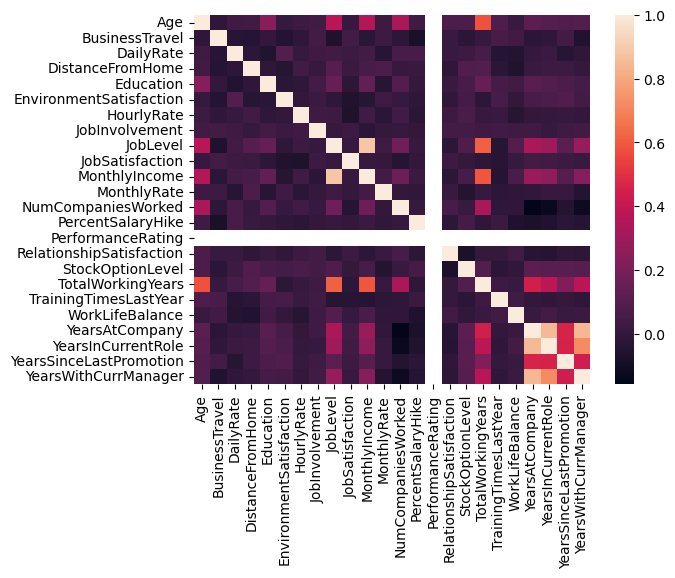

In [6]:
# correlation matrix to check for multicolenearity
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

corrmatrix = df.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('OrRd'), axis=1) 
corrmatrix

In [7]:
# dropping high correlation variables

cor_matrix = df.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool_))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.7)]
df = df.drop(to_drop, axis=1)
to_drop

['MonthlyIncome', 'YearsInCurrentRole', 'YearsWithCurrManager']

In [8]:
# splitting the dataset

X = df.drop(columns=['Attrition'], axis=1)
y = df['Attrition'] == 'Yes'

In [9]:
#building a random forest to determine feature importance 

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y)

numerical_features = X.select_dtypes(include='int64')
categorical_features = X.select_dtypes(exclude= 'int64')

numerical_features_names = numerical_features.columns.tolist()
categorical_features_names = categorical_features.columns.tolist()

preprocess = ColumnTransformer(transformers=[
    ('num', StandardScaler(), numerical_features_names),
    ('cat', OneHotEncoder(), categorical_features_names)
])

X_transformed = preprocess.fit_transform(X)

model = RandomForestClassifier()
model.fit(X_transformed, y)

importances = model.feature_importances_

sorted_importances = sorted(importances, reverse=True)

sorted_index = np.argsort(importances)[::-1]

importances = model.feature_importances_

feature_importances = pd.DataFrame({'Feature': numerical_features_names + list(preprocess.named_transformers_['cat'].get_feature_names(categorical_features_names)), 'Importance': importances})

feature_importances = feature_importances.sort_values('Importance', ascending=False)

threshold = 0.03

feature_importances

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Feature,Importance
0,Age,0.073709
2,DailyRate,0.067213
16,TotalWorkingYears,0.058838
6,HourlyRate,0.058304
10,MonthlyRate,0.053769
3,DistanceFromHome,0.052684
19,YearsAtCompany,0.045381
5,EnvironmentSatisfaction,0.036063
12,PercentSalaryHike,0.034040
11,NumCompaniesWorked,0.032987


In [10]:
from sklearn.model_selection import train_test_split
from sklearn import tree

# creating feature transformer

X_train, X_test, y_train, y_test = train_test_split(X, y)

# separating numerical and categorical columns

categorical_columns = X.select_dtypes(include="object").columns.tolist()
numerical_columns = X.select_dtypes(exclude="object").columns.tolist()

transformer = ColumnTransformer([("ohe_encoder", OneHotEncoder(sparse = False), categorical_columns),
                               ("mean", SimpleImputer(strategy = "mean"), numerical_columns)],
                                remainder = "passthrough")

# creating pipe with data cleaning, normalization and decision tree


norm = MinMaxScaler()
tree1 = tree.DecisionTreeClassifier()

steps = [("data_cleaning", transformer),
            ("normalization", norm),
            ("training", tree1)]

pipe = Pipeline(steps)

pipe.fit(X_train, y_train)


from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Make prediction on the test set
pred = pipe.predict(X_test)
 
#calculating precision and reall
precision_tree = precision_score(y_test, pred)
recall_tree = recall_score(y_test, pred)
 
print('Precision: ',precision_tree)
print('Recall: ',recall_tree)

Precision:  0.30303030303030304
Recall:  0.3333333333333333


In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# creating feature transformer

X_train, X_test, y_train, y_test = train_test_split(X, y)

# separating numerical and categorical columns

categorical_columns = X.select_dtypes(include="object").columns.tolist()
numerical_columns = X.select_dtypes(exclude="object").columns.tolist()

transformer = ColumnTransformer([("ohe_encoder", OneHotEncoder(sparse = False), categorical_columns),
                               ("mean", SimpleImputer(strategy = "mean"), numerical_columns)],
                                remainder = "passthrough")

# creating pipe with data cleaning, normalization and random forest


norm = MinMaxScaler()
random_forest = RandomForestClassifier()

steps = [("data_cleaning", transformer),
            ("normalization", norm),
            ("training", random_forest)]

pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Make prediction on the test set
pred = pipe.predict(X_test)
 
#calculating precision and reall
precision_randomforest = precision_score(y_test, pred)
recall_randomforest = recall_score(y_test, pred)
 
print('Precision: ',precision_randomforest)
print('Recall: ',recall_randomforest)

Precision:  0.8333333333333334
Recall:  0.125


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


# creating feature transformer

X_train, X_test, y_train, y_test = train_test_split(X, y)

# separating numerical and categorical columns

categorical_columns = X.select_dtypes(include="object").columns.tolist()
numerical_columns = X.select_dtypes(exclude="object").columns.tolist()

transformer = ColumnTransformer([("ohe_encoder", OneHotEncoder(sparse = False), categorical_columns),
                               ("mean", SimpleImputer(strategy = "mean"), numerical_columns)],
                                remainder = "passthrough")

# creating pipe with data cleaning, normalization and KNN


norm = MinMaxScaler()
random_forest = KNeighborsClassifier()

steps = [("data_cleaning", transformer),
            ("normalization", norm),
            ("training", random_forest)]

pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Make prediction on the test set
pred = pipe.predict(X_test)
 
#calculating precision and reall
precision_KNN = precision_score(y_test, pred)
recall_KNN = recall_score(y_test, pred)
 
print('Precision: ',precision_KNN)
print('Recall: ',recall_KNN)

Precision:  0.5
Recall:  0.1111111111111111


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:237: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



# creating feature transformer

X_train, X_test, y_train, y_test = train_test_split(X, y)

# separating numerical and categorical columns

categorical_columns = X.select_dtypes(include="object").columns.tolist()
numerical_columns = X.select_dtypes(exclude="object").columns.tolist()

transformer = ColumnTransformer([("ohe_encoder", OneHotEncoder(sparse = False), categorical_columns),
                               ("mean", SimpleImputer(strategy = "mean"), numerical_columns)],
                                remainder = "passthrough")

# creating pipe with data cleaning, normalization and logistic regression


norm = MinMaxScaler()
lr = LogisticRegression(solver = 'lbfgs', max_iter=1000)

steps = [("data_cleaning", transformer),
            ("normalization", norm),
            ("training", lr)]

pipe = Pipeline(steps)

pipe.fit(X_train, y_train)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

#Make prediction on the test set
pred = pipe.predict(X_test)
 
#calculating precision and reall
precision_logistic_regression = precision_score(y_test, pred)
recall_logistic_regression = recall_score(y_test, pred)
 
print('Precision: ',precision_logistic_regression)
print('Recall: ',recall_logistic_regression)

Precision:  0.8333333333333334
Recall:  0.5357142857142857


The model that provided highest precision and recall is Logistic Regression.